## End of Distribution imputation 

It works well if the data are __not missing completly at random i.e MNAR__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic.csv", usecols = ['Survived','Age','Fare'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

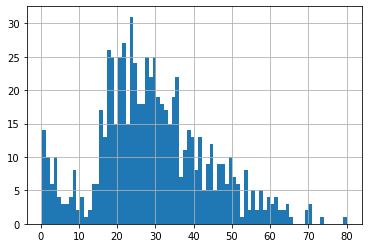

In [4]:
df.Age.hist(bins =80)

So here I have to pickup the right end of the data (end of distribution) i.e last of values from above graph and will replace with NaN value

In [5]:
df.Age.mean()

29.69911764705882

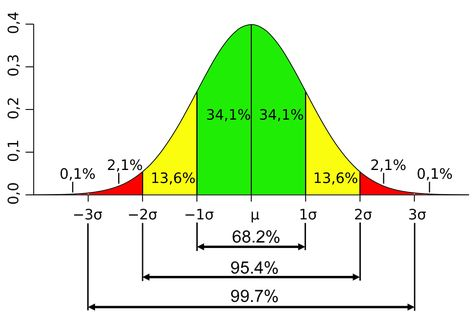

In [6]:
from IPython.display import Image
Image(filename='normal distribution image.jpg') 

Here will take 3rd standard deviation (3sigma). so will add 3 with mean value and multiply with standard deviation

In [7]:
extreme = df.Age.mean()+3*df.Age.std()

<AxesSubplot:xlabel='Age'>

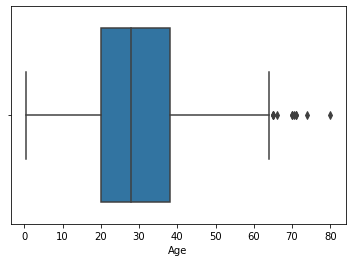

In [8]:
#checking the outlier
sns.boxplot('Age', data = df)

As we can see there is outlier at the right end of the graph

In [9]:
#Create a function to replace misssing in Age with extreme values
def impute_NaN(df,variable,median,extreme):
    df[variable + '_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [10]:
impute_NaN(df,'Age',df.Age.median(),extreme)

In [11]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

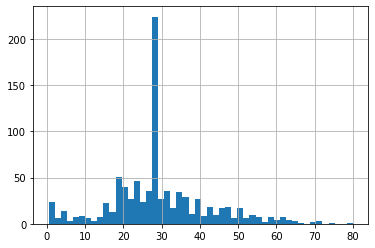

In [12]:
df['Age'].hist(bins = 50)

<AxesSubplot:>

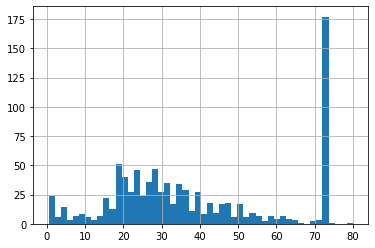

In [13]:
df['Age_end_distribution'].hist(bins = 50)

<AxesSubplot:xlabel='Age_end_distribution'>

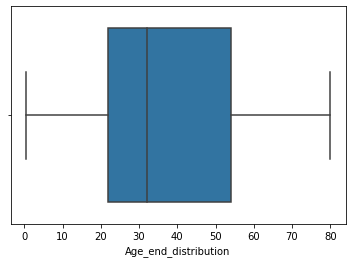

In [14]:
sns.boxplot('Age_end_distribution', data = df)

## Advantages

>1. Easy to implement

>2. Captures the importance of missingess if there is one

## Disadvantages
>1. Distorts the original distribution of the variable

>2. If missingess is not important, it may mask the predictive power of the original variable by distoring its distribution

>3. If the number of NA is big. It will mask true outliers in the distribution. 

>4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent of feature engineering